Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8157 - loss: 0.7158
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9145 - loss: 0.3079
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9208 - loss: 0.2835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9228 - loss: 0.2748
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9278 - loss: 0.2627
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9164 - loss: 0.3025  
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Text(95.72222222222221, 0.5, 'Truth')

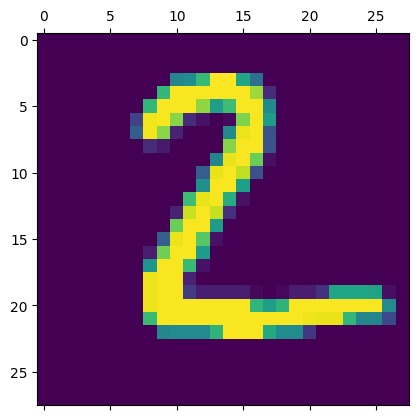

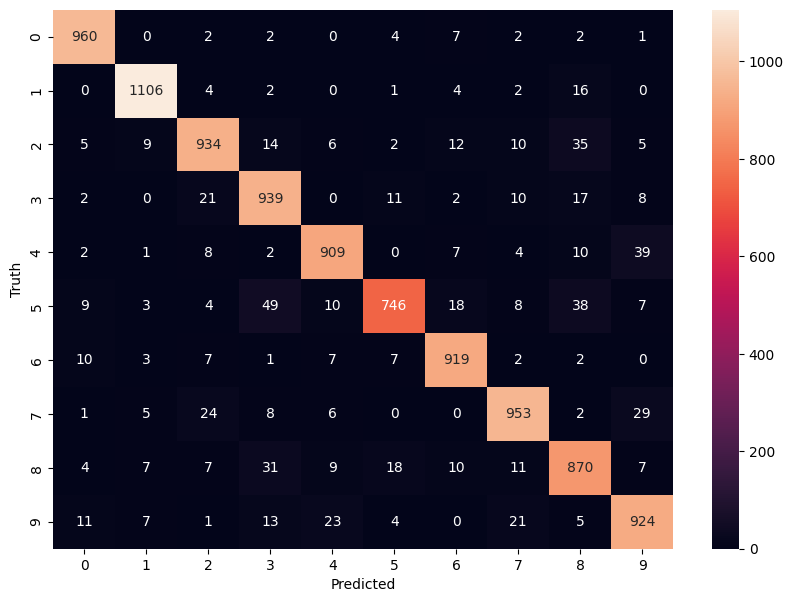

In [12]:
import tensorflow as tf
import seaborn as sn
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train=X_train/255
X_test=X_test/255
X_train_flattened= X_train.reshape(len(X_train),28*28)
X_test_flattened= X_test.reshape(len(X_test),28*28)

model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)
model.evaluate(X_test_flattened,y_test)

plt.matshow(X_test[1])
y_predicted=model.predict(X_test_flattened)
# y_predicted[1]

# np.argmax(y_predicted[1])

y_predicted_label=[int(np.argmax(i)) for i in y_predicted]
y_predicted_label[:5]
y_test[:5]


cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_label)
cm



plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

